In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import gencat
import numpy as np
from scipy import sparse
from gencat import gencat_reproduction

from func import adj_plot,load_data

In [3]:
# Load .npy files
edges = np.load(r"pokec_n dataset\region_job_2_2_edges.npy").T
features = np.load(r"pokec_n dataset\region_job_2_2_features.npy")
labels = np.load(r"pokec_n dataset\region_job_2_2_labels.npy")
sens = np.load(r"pokec_n dataset\region_job_2_2_sens.npy")

# Build sparse adjacency matrix
n = features.shape[0]  # total number of nodes
S_ori  = sparse.lil_matrix((n, n))
C = labels

for u, v in edges:
    S_ori[u, v] = 1
    S_ori[v, u] = 1  # assuming undirected
"""
# Optional: restrict to labeled nodes only
labeled_nodes = np.arange(len(labels))
S_labeled = S[labeled_nodes, :][:, labeled_nodes]
features_labeled = features[labeled_nodes]
sens_labeled = sens  # assumed aligned with labels"
"""

'\n# Optional: restrict to labeled nodes only\nlabeled_nodes = np.arange(len(labels))\nS_labeled = S[labeled_nodes, :][:, labeled_nodes]\nfeatures_labeled = features[labeled_nodes]\nsens_labeled = sens  # assumed aligned with labels"\n'

In [4]:
num_classes = len(np.unique(labels))
d = features.shape[1]
k = len(np.unique(C))
H = np.zeros((d, num_classes))

for c in range(num_classes):
    class_mask = labels == c
    if class_mask.sum() == 0:
        continue
    H[:, c] = features[class_mask].mean(axis=0)

H = np.array(H)
H = np.clip(H, 0, 1)

In [5]:
S_syn, X_syn, C_syn, sens_syn = gencat_reproduction(S_ori, C, H, d=d, sens=sens)



number of generated edges : 15073


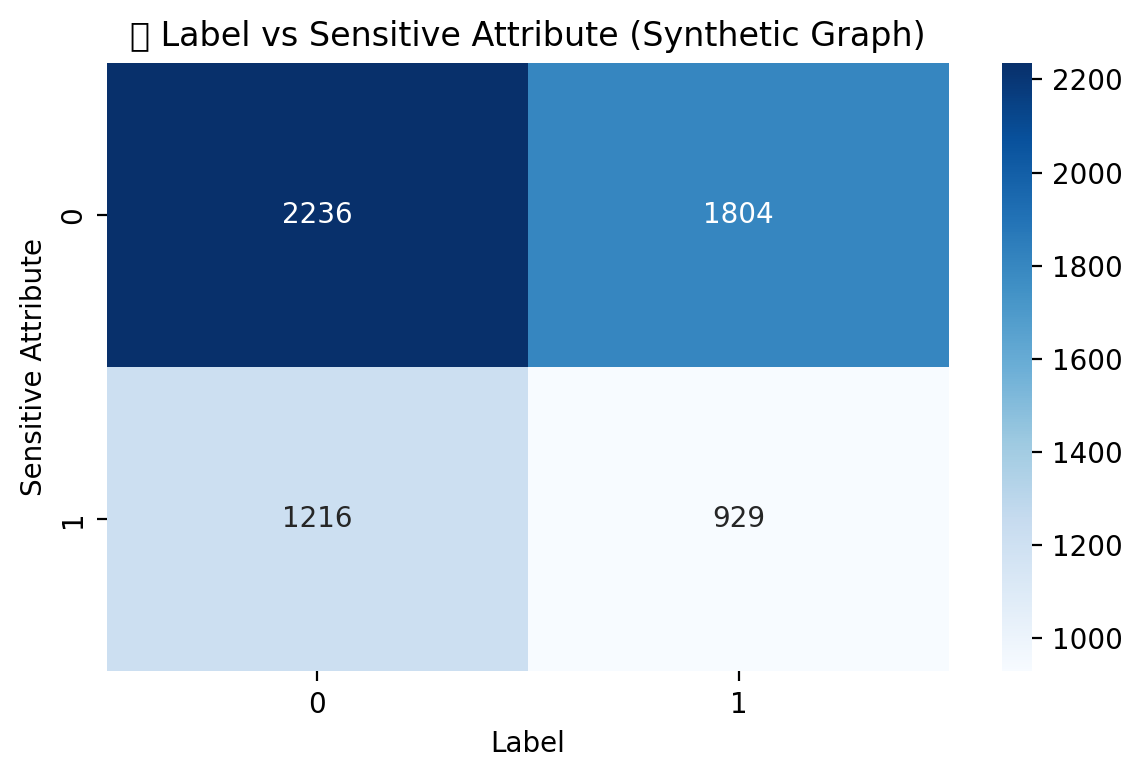

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make a DataFrame from synthetic labels and sens
df = pd.DataFrame({
    'label': C_syn,
    'sens': sens
})

# Create a cross-tabulation table (sens × label counts)
crosstab = pd.crosstab(df['sens'], df['label'])

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title("🔍 Label vs Sensitive Attribute (Synthetic Graph)")
plt.xlabel("Label")
plt.ylabel("Sensitive Attribute")
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

# Updated contingency table from the heatmap
table = np.array([
    [2236, 1804],
    [1216,  929]
])

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(table)

# Display results
print(f"Chi² statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")

if p < 0.05:
    print("The result is statistically significant — label distribution likely differs between groups.")
else:
    print("The result is not statistically significant — no strong evidence of difference.")


Chi² statistic: 0.9716
p-value: 0.3243
⚠️ The result is not statistically significant — no strong evidence of difference.


In [7]:
print("DataFrame head:\n", df.head())
print("Unique sens:", df['sens'].unique())
print("Unique labels:", df['label'].unique())

DataFrame head:
    label  sens
0      1     1
1      1     0
2      0     0
3      1     1
4      1     0
Unique sens: [1 0]
Unique labels: [1 0]


In [9]:
H_random = np.random.rand(d, k)

In [10]:
S_syn, X_syn, C_syn, sens_syn = gencat_reproduction(S_ori, C, H_random, d=d, sens=sens)

number of generated edges : 15087


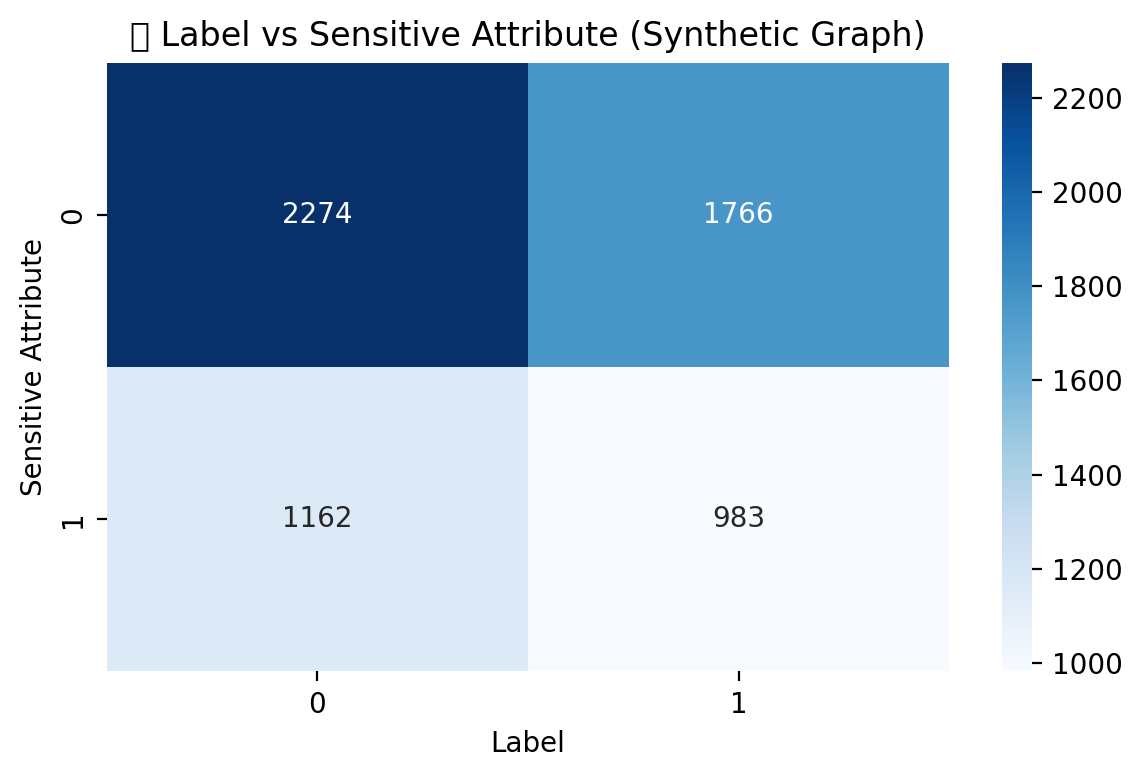

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make a DataFrame from synthetic labels and sens
df = pd.DataFrame({
    'label': C_syn,
    'sens': sens
})

# Create a cross-tabulation table (sens × label counts)
crosstab = pd.crosstab(df['sens'], df['label'])

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title("Label vs Sensitive Attribute (Synthetic Graph)")
plt.xlabel("Label")
plt.ylabel("Sensitive Attribute")
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

# Updated contingency table from the heatmap
table = np.array([
    [2274, 1766],
    [1162,  983]
])

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(table)

# Display results
print(f"Chi² statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")

if p < 0.05:
    print("The result is statistically significant — label distribution likely differs between groups.")
else:
    print("The result is not statistically significant — no strong evidence of difference.")


Chi² statistic: 2.4525
p-value: 0.1173
⚠️ The result is not statistically significant — no strong evidence of difference.


In [13]:
assert len(C_syn) == len(sens)  # Should be True

# Compare distribution
from collections import Counter
print("C_syn label distribution by sens:")
print(Counter(zip(sens, C_syn)))


C_syn label distribution by sens:
Counter({(np.int64(0), 0): 2274, (np.int64(0), 1): 1766, (np.int64(1), 0): 1162, (np.int64(1), 1): 983})


Intentionally Biased H

In [20]:
# Setup
d = features.shape[1]
k = len(np.unique(labels))

# Create two biased prototypes
bias_vec_0 = np.random.rand(d) + 0.6  # shifted right
bias_vec_1 = np.random.rand(d) - 0.6  # shifted left

# Clip to [0, 1] range to avoid extreme values
bias_vec_0 = np.clip(bias_vec_0, 0, 1)
bias_vec_1 = np.clip(bias_vec_1, 0, 1)

# Inject into H
H_biased = np.zeros((d, k))
H_biased[:, 0] = bias_vec_0  # pretend label 0 is mostly from sens 0
H_biased[:, 1] = bias_vec_1  # pretend label 1 is mostly from sens 1


In [21]:
S_syn_biased, X_syn_biased, C_syn_biased, sens_biased = gencat_reproduction(
    S_ori, labels, H_biased, d=d, sens=sens
)


number of generated edges : 15071


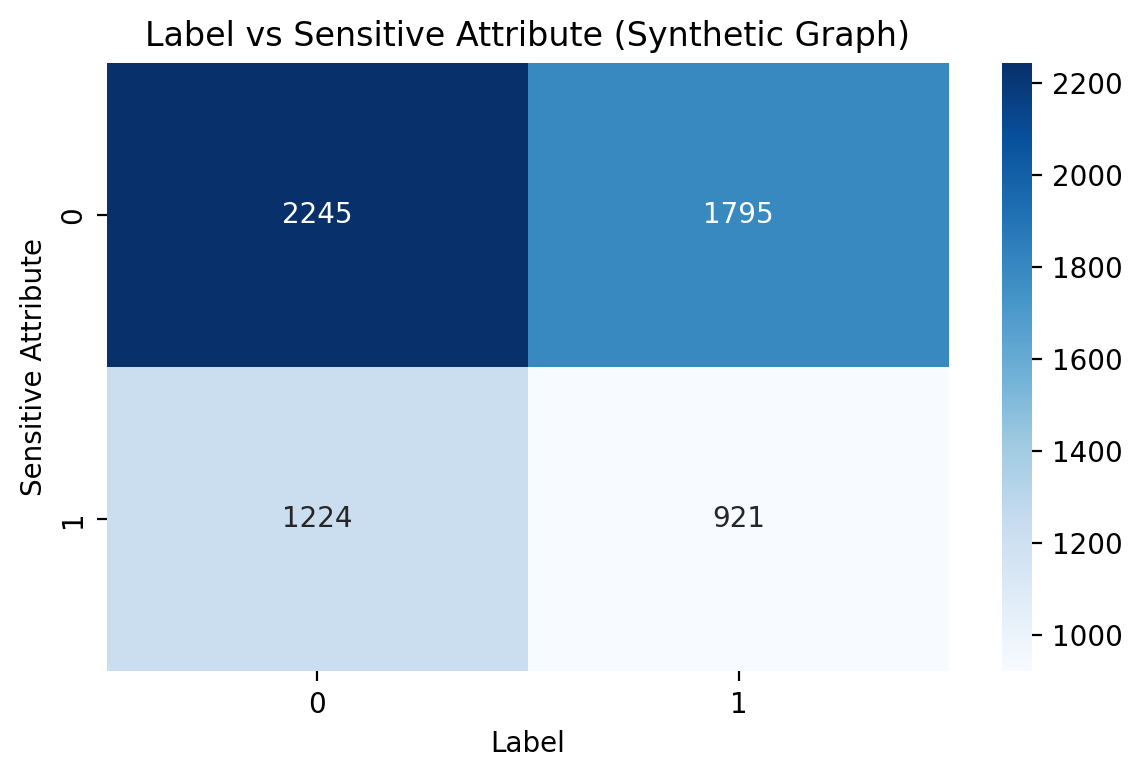

In [22]:

# Make a DataFrame from synthetic labels and sens
df = pd.DataFrame({
    'label': C_syn_biased,
    'sens': sens
})

# Create a cross-tabulation table (sens × label counts)
crosstab = pd.crosstab(df['sens'], df['label'])

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title("Label vs Sensitive Attribute (Synthetic Graph)")
plt.xlabel("Label")
plt.ylabel("Sensitive Attribute")
plt.tight_layout()
plt.show()


In [24]:
from scipy.stats import chi2_contingency
import numpy as np

# Updated contingency table from the heatmap
table = np.array([
    [2245, 1795],
    [1224,  921]
])

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(table)

# Display results
print(f"Chi² statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")

if p < 0.05:
    print("The result is statistically significant — label distribution likely differs between groups.")
else:
    print("The result is not statistically significant — no strong evidence of difference.")


Chi² statistic: 1.2092
p-value: 0.2715
The result is not statistically significant — no strong evidence of difference.


## Features with Sens

In [25]:
features_with_sens = np.hstack([features, sens.reshape(-1, 1)])
d_new = features_with_sens.shape[1]


In [33]:
print("H shape:", H.shape)
print("d_new:", d_new)

H shape: (266, 2)
d_new: 267


In [35]:
H = np.zeros((d_new, k))
for c in range(k):
    class_mask = labels == c
    if class_mask.sum() == 0:
        continue
    H[:, c] = features_with_sens[class_mask].mean(axis=0)


H = np.array(H)
H = np.clip(H, 0, 1)

In [36]:
S_syn_sens, X_syn_sens, C_syn_sens, sens_syn_sens = gencat_reproduction(S_ori, C, H, d=d_new, sens=sens)

number of generated edges : 15103


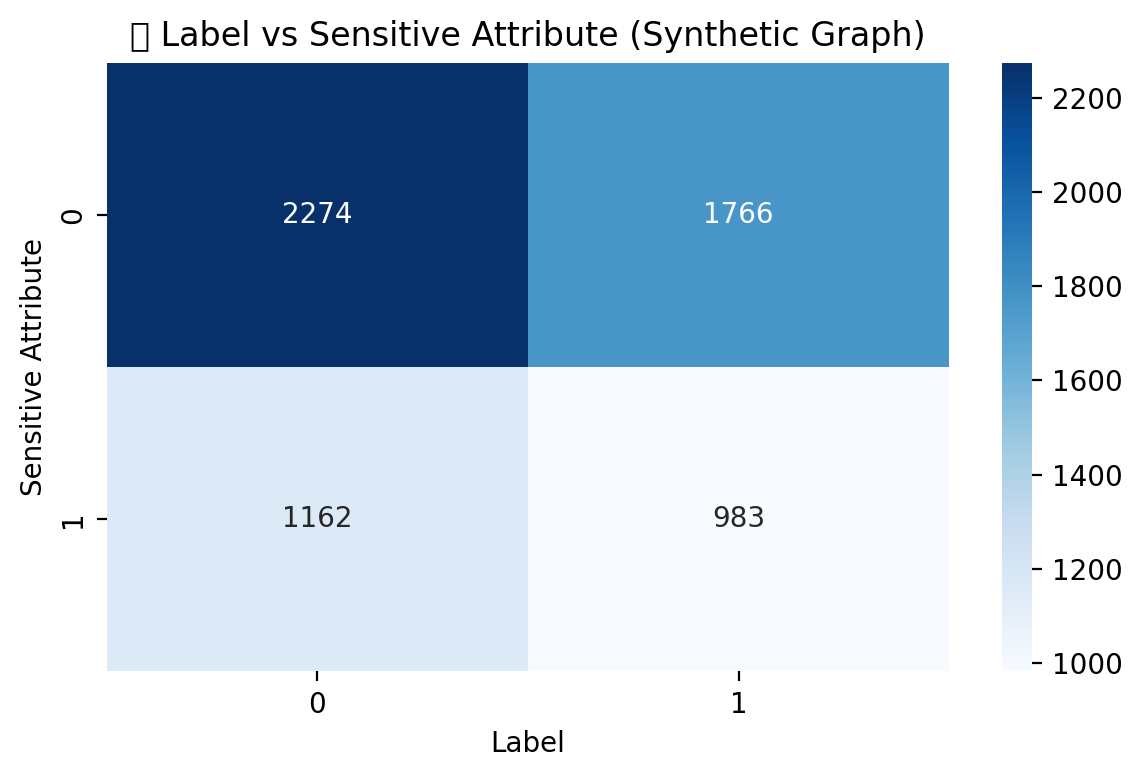

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make a DataFrame from synthetic labels and sens
df = pd.DataFrame({
    'label': C_syn,
    'sens': sens
})

# Create a cross-tabulation table (sens × label counts)
crosstab = pd.crosstab(df['sens'], df['label'])

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title("🔍 Label vs Sensitive Attribute (Synthetic Graph)")
plt.xlabel("Label")
plt.ylabel("Sensitive Attribute")
plt.tight_layout()
plt.show()


In [38]:
# Updated contingency table from the heatmap
table = np.array([
    [2274, 1766],
    [1162,  983]
])

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(table)

# Display results
print(f"Chi² statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")

if p < 0.05:
    print("The result is statistically significant — label distribution likely differs between groups.")
else:
    print("The result is not statistically significant — no strong evidence of difference.")

Chi² statistic: 2.4525
p-value: 0.1173
The result is not statistically significant — no strong evidence of difference.
